In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df = pd.read_csv('./nba-web-scraping-project.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,12.0,34.3,31.9,10.7,21.1,50.6,1.1,...,88.4,3.3,7.8,11.1,6.0,1.0,1.6,3.8,36.2,2023-24
2,2,Luka Doncic,DAL,13.0,34.8,31.0,10.7,21.0,50.9,4.2,...,74.0,0.7,7.2,7.8,8.2,1.0,0.4,4.3,31.8,2023-24
3,3,Kevin Durant,PHX,12.0,36.3,30.8,10.6,20.0,52.9,2.2,...,86.4,0.4,6.8,7.2,5.1,0.8,1.1,3.7,30.6,2023-24
4,4,Stephen Curry,GSW,12.0,33.2,30.3,9.4,19.7,47.9,5.6,...,93.3,0.8,4.0,4.8,3.8,0.9,0.2,3.6,25.8,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,99,Patty Mills,BKN,81.0,29.0,11.4,4.0,9.8,40.8,2.8,...,81.4,0.2,1.7,1.9,2.3,0.6,0.2,0.9,9.6,2021-22
409,100,Immanuel Quickley,NYK,78.0,23.1,11.3,3.6,9.3,39.2,1.8,...,88.1,0.4,2.8,3.2,3.5,0.7,0.0,1.3,11.5,2021-22
410,101,Gary Harris,ORL,61.0,28.4,11.1,3.9,9.1,43.4,1.9,...,87.4,0.6,1.4,2.0,1.8,1.0,0.1,1.0,9.7,2021-22
411,102,Grayson Allen,MIL,66.0,27.3,11.1,3.9,8.6,44.8,2.4,...,86.5,0.5,2.9,3.4,1.5,0.7,0.3,0.7,11.4,2021-22


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       413 non-null    object 
 1   PLAYER  410 non-null    object 
 2   TEAM    410 non-null    object 
 3   GP      410 non-null    float64
 4   MIN     410 non-null    float64
 5   PTS     410 non-null    float64
 6   FGM     410 non-null    float64
 7   FGA     410 non-null    float64
 8   FG%     410 non-null    float64
 9   3PM     410 non-null    float64
 10  3PA     410 non-null    float64
 11  3P%     410 non-null    float64
 12  FTM     410 non-null    float64
 13  FTA     410 non-null    float64
 14  FT%     410 non-null    float64
 15  OREB    410 non-null    float64
 16  DREB    410 non-null    float64
 17  REB     410 non-null    float64
 18  AST     410 non-null    float64
 19  STL     410 non-null    float64
 20  BLK     410 non-null    float64
 21  TOV     410 non-null    float64
 22  EF

# Data Cleaning

In [219]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [220]:
# Create a rearranged list 
arrange_columns = ['PLAYER', 'YEAR','TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,12.0,34.3,31.9,10.7,21.1,50.6,1.1,...,10.8,88.4,3.3,7.8,11.1,6.0,1.0,1.6,3.8,36.2
2,Luka Doncic,2023-24,DAL,13.0,34.8,31.0,10.7,21.0,50.9,4.2,...,7.4,74.0,0.7,7.2,7.8,8.2,1.0,0.4,4.3,31.8
3,Kevin Durant,2023-24,PHX,12.0,36.3,30.8,10.6,20.0,52.9,2.2,...,8.6,86.4,0.4,6.8,7.2,5.1,0.8,1.1,3.7,30.6
4,Stephen Curry,2023-24,GSW,12.0,33.2,30.3,9.4,19.7,47.9,5.6,...,6.3,93.3,0.8,4.0,4.8,3.8,0.9,0.2,3.6,25.8
5,Shai Gilgeous-Alexander,2023-24,OKC,12.0,34.9,29.8,11.3,21.5,52.3,1.4,...,6.3,92.1,0.8,5.8,6.5,6.0,2.6,0.8,2.3,32.6


In [221]:
player_count = df['PLAYER'].nunique()
team_count = df['TEAM'].nunique()

print(f"Number of players: {player_count}")
print(f"Number of teams: {team_count}")

Number of players: 278
Number of teams: 30


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 1 to 412
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  410 non-null    object 
 1   YEAR    410 non-null    object 
 2   TEAM    410 non-null    object 
 3   GP      410 non-null    float64
 4   MIN     410 non-null    float64
 5   PTS     410 non-null    float64
 6   FGM     410 non-null    float64
 7   FGA     410 non-null    float64
 8   FG%     410 non-null    float64
 9   3PM     410 non-null    float64
 10  3PA     410 non-null    float64
 11  3P%     410 non-null    float64
 12  FTM     410 non-null    float64
 13  FTA     410 non-null    float64
 14  FT%     410 non-null    float64
 15  OREB    410 non-null    float64
 16  DREB    410 non-null    float64
 17  REB     410 non-null    float64
 18  AST     410 non-null    float64
 19  STL     410 non-null    float64
 20  BLK     410 non-null    float64
 21  TOV     410 non-null    float64
 22  EF

# Visualization

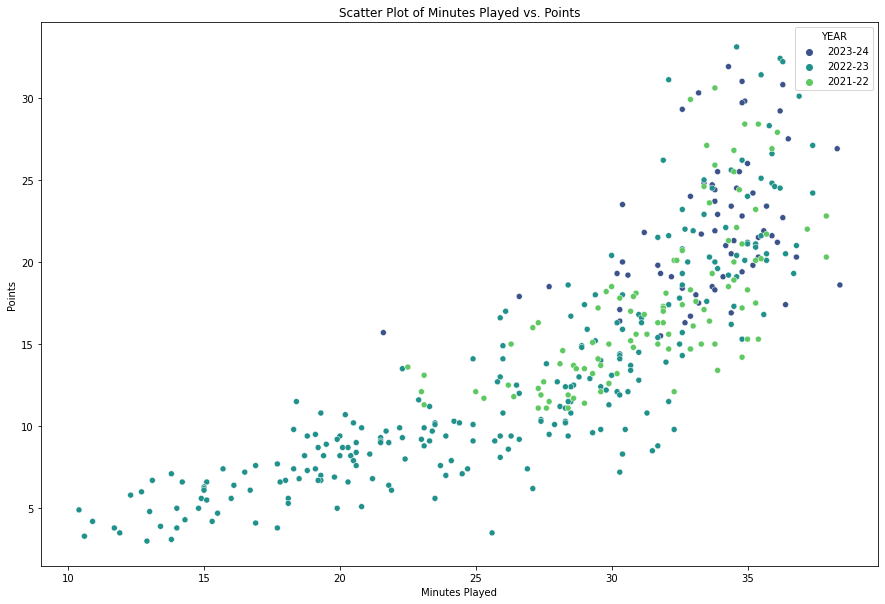

In [223]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(15, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [224]:
# Define a data frame with three players
three_player_df = df.loc[(df['PLAYER'] == 'Luka Doncic') | (df['PLAYER'] == 'Pascal Siakam') | (df['PLAYER'] == 'DeMar DeRozan')]
three_player_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
2,Luka Doncic,2023-24,DAL,13.0,34.8,31.0,10.7,21.0,50.9,4.2,...,7.4,74.0,0.7,7.2,7.8,8.2,1.0,0.4,4.3,31.8
32,DeMar DeRozan,2023-24,CHI,13.0,35.4,21.5,7.5,17.0,44.3,0.8,...,6.8,80.9,1.1,2.1,3.2,4.3,1.1,0.9,1.2,19.0
47,Pascal Siakam,2023-24,TOR,12.0,34.1,19.1,7.6,15.6,48.7,1.0,...,4.2,70.0,1.3,5.9,7.2,4.8,0.8,0.2,2.8,19.9
66,Luka Doncic,2022-23,DAL,66.0,36.2,32.4,10.9,22.0,49.6,2.8,...,10.5,74.2,0.8,7.8,8.6,8.0,1.4,0.5,3.6,33.5
81,DeMar DeRozan,2022-23,CHI,74.0,36.2,24.5,8.9,17.6,50.4,0.6,...,7.1,87.2,0.5,4.2,4.6,5.1,1.1,0.5,2.1,24.2
83,Pascal Siakam,2022-23,TOR,71.0,37.4,24.2,8.9,18.5,48.0,1.3,...,6.7,77.4,1.8,6.0,7.8,5.8,0.9,0.5,2.4,25.8
313,Luka Doncic,2021-22,DAL,65.0,35.4,28.4,9.9,21.6,45.7,3.1,...,7.5,74.4,0.9,8.3,9.1,8.7,1.2,0.6,4.5,29.8
315,DeMar DeRozan,2021-22,CHI,76.0,36.1,27.9,10.2,20.2,50.4,0.7,...,7.8,87.7,0.7,4.4,5.2,4.9,0.9,0.3,2.4,25.8
325,Pascal Siakam,2021-22,TOR,68.0,37.9,22.8,8.8,17.8,49.4,1.1,...,5.6,74.9,1.9,6.6,8.5,5.3,1.3,0.6,2.7,25.5
